# Meta Data
Assume user downloaded archive.zip from Kaggle,
renamed the file BuildingData.zip,
and stored the file in the data subdirectory.
Assume the zip file contains the metadata.csv file.  

In [1]:
DATAPATH=''
try:
    # On Google Drive, set path to my drive / data directory.
    from google.colab import drive
    IN_COLAB = True
    PATH='/content/drive/'
    drive.mount(PATH)
    DATAPATH=PATH+'My Drive/data/'  # must end in "/"
except:
    # On home computer, set path to local data directory.
    IN_COLAB = False
    DATAPATH='data/'  # must end in "/"

ZIP_FILE='BuildingData.zip'
ZIP_PATH = DATAPATH+ZIP_FILE
META_FILE='metadata.csv'
MODEL_FILE='Model'  # will be used later to save models

In [2]:
from os import listdir
import csv
from zipfile import ZipFile
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import colors
mycmap = colors.ListedColormap(['red','blue'])  # list color for label 0 then 1
np.set_printoptions(precision=2)

In [3]:
def read_csv_to_numpy(filename): # array of string, header=row[0]
    with open(ELEC_PATH,'r') as handle:
        data_iter = csv.reader(handle,delimiter = ',',quotechar = '"')
        data = [data for data in data_iter]
        return np.asarray(data, dtype = None)
# Pandas incorporates column headers, row numbers, timestamps, and NaN for missing values.
def read_csv_to_panda(filename): # pandas data frame
    return pd.read_csv(filename)
def read_zip_to_panda(zip_filename,csv_filename):
    zip_handle = ZipFile(zip_filename)
    csv_handle = zip_handle.open(csv_filename)
    panda = pd.read_csv(csv_handle)
    return panda

In [4]:
meta_df = read_zip_to_panda(ZIP_PATH,META_FILE)
meta_df

,building_id,site_id,building_id_kaggle,site_id_kaggle,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,lat,lng,...,yearbuilt,date_opened,numberoffloors,occupants,energystarscore,eui,site_eui,source_eui,leed_level,rating
0,Panther_lodging_Dean,Panther,NaN,0.0,Lodging/residential,Residence Hall,508.8,5477.0,28.517689,-81.379039,...,1989.0,NaN,NaN,NaN,NaN,271,NaN,NaN,None,NaN
1,Panther_lodging_Shelia,Panther,NaN,0.0,Lodging/residential,Residence Hall,929.0,10000.0,28.517689,-81.379039,...,1992.0,NaN,NaN,NaN,NaN,62,NaN,NaN,None,NaN
2,Panther_lodging_Ricky,Panther,NaN,0.0,Lodging/residential,Residence Hall,483.1,5200.0,28.517689,-81.379039,...,2016.0,NaN,NaN,NaN,NaN,534,NaN,NaN,None,NaN
3,Panther_education_Rosalie,Panther,0.0,0.0,Education,Research,690.5,7432.0,28.517689,-81.379039,...,2008.0,NaN,NaN,NaN,NaN,276,NaN,NaN,None,NaN
4,Panther_education_Misty,Panther,1.0,0.0,Education,Research,252.7,2720.0,28.517689,-81.379039,...,2004.0,NaN,NaN,NaN,NaN,375,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,Mouse_health_Estela,Mouse,NaN,NaN,Healthcare,Hospital,17193.0,185064.0,51.521939,-0.120069,...,1936.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,F
1632,Mouse_health_Ileana,Mouse,NaN,NaN,Healthcare,Hospital,5399.0,58114.0,51.521939,-0.120069,...,1954.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,F
1633,Mouse_health_Buddy,Mouse,NaN,NaN,Healthcare,Hospital,1749.0,18826.0,51.521939,-0.120069,...,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,F
1634,Mouse_lodging_Vicente,Mouse,NaN,NaN,Lodging/residential,Hotel,3489.0,37555.0,51.521939,-0.120069,...,2006.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,F


In [5]:
print("Columns:\n",meta_df.columns)
print("Shape:",meta_df.shape)
NUM_ROWS=meta_df.shape[0]
NUM_COLS=meta_df.shape[1]

Columns:
 Index(['building_id', 'site_id', 'building_id_kaggle', 'site_id_kaggle',
       'primaryspaceusage', 'sub_primaryspaceusage', 'sqm', 'sqft', 'lat',
       'lng', 'timezone', 'electricity', 'hotwater', 'chilledwater', 'steam',
       'water', 'irrigation', 'solar', 'gas', 'industry', 'subindustry',
       'heatingtype', 'yearbuilt', 'date_opened', 'numberoffloors',
       'occupants', 'energystarscore', 'eui', 'site_eui', 'source_eui',
       'leed_level', 'rating'],
      dtype='object')
Shape: (1636, 32)


In [6]:
# Pandas statistics per column. Counts excludes NaN columns and values.
meta_df.describe()

,building_id_kaggle,site_id_kaggle,sqm,sqft,lat,lng,yearbuilt,numberoffloors,occupants
count,1449.000000,1599.000000,1636.000000,1636.000000,1399.000000,1399.000000,817.000000,441.000000,230.000000
mean,724.000000,6.722326,8224.033068,88522.795232,39.996887,-73.779899,1968.236230,3.614512,263.217391
std,418.434583,4.943530,10050.121946,108178.666361,7.403876,36.795109,30.935801,3.250338,401.643279
min,0.000000,0.000000,26.300000,283.000000,28.517689,-122.260729,1900.000000,1.000000,0.000000
25%,362.000000,3.000000,1936.925000,20849.000000,33.424425,-97.743100,1949.000000,1.000000,15.000000
50%,724.000000,5.000000,5074.400000,54620.500000,38.903504,-77.005349,1971.000000,2.000000,100.000000
75%,1086.000000,12.000000,10360.675000,111521.000000,44.978782,-76.485292,1994.000000,5.000000,314.500000
max,1448.000000,15.000000,81290.100000,875000.000000,53.349800,6.260300,2017.000000,26.000000,2380.000000


In [7]:
print("For each column, number of rows in which column is not null:")
print(meta_df.count(axis=0))

For each column, number of rows in which column is not null:
building_id              1636
site_id                  1636
building_id_kaggle       1449
site_id_kaggle           1599
primaryspaceusage        1615
sub_primaryspaceusage    1615
sqm                      1636
sqft                     1636
lat                      1399
lng                      1399
timezone                 1636
electricity              1578
hotwater                  185
chilledwater              555
steam                     370
water                     146
irrigation                 37
solar                       5
gas                       177
industry                  579
subindustry               579
heatingtype               215
yearbuilt                 817
date_opened                21
numberoffloors            441
occupants                 230
energystarscore           163
eui                       299
site_eui                  163
source_eui                163
leed_level                136
rating   

## Meter Type
Meter types include solar, electric, hot water.  
If a building says electricity=yes, then we have electric meter data for that building.  
Some buildings have none, some have several.  

In [8]:
print("Building count for each meter type (some buildings have seeral):")
energy_types=['electricity','hotwater','chilledwater','steam','irrigation','solar','gas']
meta_df[energy_types].count()

Building count for each meter type (some buildings have seeral):


electricity     1578
hotwater         185
chilledwater     555
steam            370
irrigation        37
solar              5
gas              177
dtype: int64

In [9]:
print("All the solar buildings come from one data source (bobcat):")
for i in range(0,NUM_ROWS):
    row=meta_df.iloc[i]
    bldg=row['building_id']
    solar=row['solar']
    if pd.notnull(solar):
        print(bldg,solar)

All the solar buildings come from one data source (bobcat):
Bobcat_education_Coleman Yes
Bobcat_education_Alissa Yes
Bobcat_office_Justine Yes
Bobcat_other_Timothy Yes
Bobcat_education_Dylan Yes


In [10]:
print("Warning: meter type is not yes/no, it is yes/nan.")
print("Nan (not-a-number) must be handled specially e.g. the isna() method.")
for col in energy_types:
    print(col,meta_df[col].unique())

Nan (not-a-number) must be handled specially e.g. the isna() method.
electricity [nan 'Yes']
hotwater [nan 'Yes']
chilledwater [nan 'Yes']
steam [nan 'Yes']
irrigation ['Yes' nan]
solar [nan 'Yes']
gas ['Yes' nan]


In [11]:
print("Buildings can many energy meters. Example:")
for i in range(0,NUM_ROWS):
    row=meta_df.iloc[i]
    bldg=row['building_id']
    cnt = 0
    if row['electricity']=='Yes':
        cnt += 1
    if row['hotwater']=='Yes':
        cnt += 1
    if cnt>1:
        print('Electricity and hot water meters:',bldg)
        break
        

Buildings can many energy meters. Example:
Electricity and hot water meters: Robin_education_Della


## Energy Ratings
We had hoped to predict energy ratings from other features.  
Unfortunately, the number of rated buildings is under 200.

In [12]:
print("Energy rating columns contain these values")
energy_types=['energystarscore','leed_level','rating']
for col in energy_types:
    print(col,':\n',meta_df[col].unique())

Energy rating columns contain these values
energystarscore :
 [nan '96' '54' '48' '98' '-' '82' '77' '51' '27' '58' '79' '45' '83' '100'
 '73' '72' '67' '35' '1' '26' '15' '71' '44' '62' '84' '52' '9' '61' '36'
 '32' '85' '70' '92']
leed_level :
 ['None' 'Gold' 'Silver' nan]
rating :
 [nan 'G' 'F' 'E' 'B' 'D' 'C' 'A' 'C1' 'D1']


In [13]:
meta_df[energy_types].count()

energystarscore    163
leed_level         136
rating             184
dtype: int64

In [14]:
print("Value counts:")
print(meta_df.rating.value_counts(dropna=False))

Value counts:
NaN    1452
D        50
C        46
E        37
F        24
G        15
B         6
A         2
D1        2
C1        2
Name: rating, dtype: int64


In [15]:
print("Value counts:")
print(meta_df.leed_level.value_counts(dropna=False))

Value counts:
NaN       1500
None       120
Gold        13
Silver       3
Name: leed_level, dtype: int64


In [16]:
print("Value counts:")
print(meta_df.energystarscore.value_counts(dropna=False))

Value counts:
NaN    1473
-       109
1         5
51        4
77        3
82        3
100       3
54        3
48        2
58        2
72        2
73        2
67        2
15        2
71        2
92        1
26        1
35        1
98        1
84        1
70        1
36        1
32        1
62        1
85        1
79        1
9         1
52        1
83        1
61        1
44        1
96        1
45        1
27        1
Name: energystarscore, dtype: int64


## EUI
EUI is the miles-per-gallon for a building. Some entries are non-numeric.  
We could calculate it from energy usage per square foot?  
We have 300 buildings with given EUI.  
Most values are nan. A few values are "-".

In [17]:
energy_types=['eui','site_eui','source_eui']
for col in energy_types:
    print(col)
    print(" count nan:",meta_df[col].isna().sum()," count -:",meta_df[meta_df[col]=='-'].shape[0])

eui
 count nan: 1337  count -: 3
site_eui
 count nan: 1473  count -: 3
source_eui
 count nan: 1473  count -: 3


In [18]:
meta_df[['eui','site_eui','source_eui']].count()

eui           299
site_eui      163
source_eui    163
dtype: int64

## Building age
We could use age as a classification to be predicted.  
Example: binary, pre-1950 vs post-1950.  
Potential problem: old buildings might have been refurbished.

In [19]:
print("Count buildings with known year built:", meta_df.yearbuilt.count())

Count buildings with known year built: 817


In [20]:
print("Count buildings binned by year built:")
meta_df.yearbuilt.value_counts(bins=10)

Count buildings binned by year built:


(1958.5, 1970.2]      151
(1970.2, 1981.9]      138
(1993.6, 2005.3]      106
(2005.3, 2017.0]      105
(1911.7, 1923.4]       66
(1981.9, 1993.6]       63
(1946.8, 1958.5]       59
(1923.4, 1935.1]       51
(1899.882, 1911.7]     41
(1935.1, 1946.8]       37
Name: yearbuilt, dtype: int64

array([[<AxesSubplot:title={'center':'yearbuilt'}>]], dtype=object)

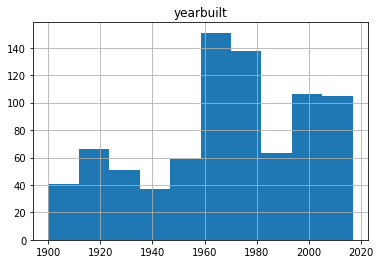

In [21]:
meta_df.hist(['yearbuilt'])

## Other fields

In [31]:
print("Heating Type (most are gas)")
print(meta_df.heatingtype.unique())
meta_df.heatingtype.value_counts(dropna=False)

Heating Type (most are gas)
[nan 'Steam' 'Heat network' 'Oil' 'Gas' 'Heat network and steam'
 'Electric' 'Heat network but not ours' 'Electricity' 'Biomass'
 'District Heating' 'Boiler fed central heating' 'Gas Boilers']


NaN                           1421
Gas                            172
Heat network                    24
District Heating                 5
Electricity                      3
Electric                         2
Steam                            2
Oil                              2
Heat network but not ours        1
Heat network and steam           1
Boiler fed central heating       1
Biomass                          1
Gas Boilers                      1
Name: heatingtype, dtype: int64

In [32]:
print("Number of Floors (most are one or two)")
meta_df.numberoffloors.value_counts(dropna=False)

Number of Floors (most are one or two)


NaN     1195
1.0      135
2.0      102
3.0       39
4.0       38
6.0       27
5.0       26
8.0       21
7.0       19
10.0      10
9.0        9
11.0       6
12.0       2
13.0       2
19.0       1
26.0       1
14.0       1
21.0       1
16.0       1
Name: numberoffloors, dtype: int64

In [34]:
print("Occupants (the mode is 100)")
meta_df.occupants.count()

Occupants (most are one or two)


230

<AxesSubplot:>

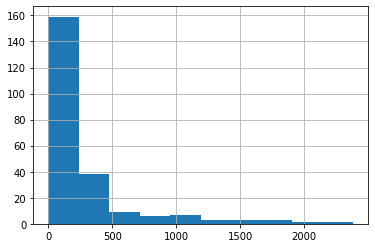

In [36]:
meta_df.occupants.hist()

In [37]:
print("Industry")
meta_df.industry.value_counts(dropna=False)

Industry


NaN            1057
Education       491
Government       80
Healthcare        6
Hospitality       2
Name: industry, dtype: int64

In [38]:
print("Time Zone")
meta_df.timezone.value_counts(dropna=False)

Time Zone


US/Eastern       812
US/Central       287
Europe/London    215
US/Mountain      173
US/Pacific       113
Europe/Dublin     36
Name: timezone, dtype: int64

Latitude


<AxesSubplot:>

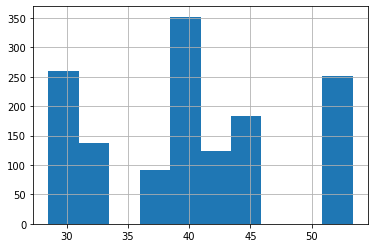

In [39]:
print("Latitude")
meta_df.lat.hist()

Square Meters


<AxesSubplot:>

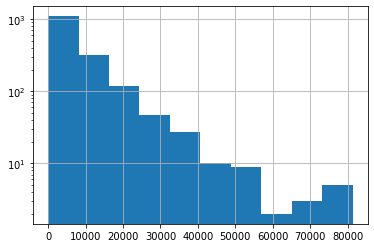

In [41]:
print("Square Meters")
meta_df.sqm.hist(log=True)